## IMAGE BINARIZATION FOR HANDWRITING OCR

f1 SCORE COMPARISON - Ross Kimberlin - 6/14/2022

(SEE ALSO https://github.com/ross-k/Image-Binarization-for-Handwriting-OCR/tree/ross-test/notebooks)

In [1]:
import cv2
import glob
import imageio as imi
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
# import PIL
from scipy import misc, ndimage
from scipy import misc, ndimage
from sklearn.metrics import accuracy_score, \
    classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import tensorflow as tf

%matplotlib inline

## STEP 1) READ IMAGES INTO PYTHON AND INSPECT

### 1a) 2016 H-DIBCO DATA SET

#### 10 images;

#### 7031 x 17,003 pixels

In [2]:
read_dir_DIBCO_2016_GT = '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/'

In [3]:
read_dir_DIBCO_2016    = '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/'

In [4]:
DIBCO_2016_GT   = []
DIBCO_2016_orig = []

for file in sorted(glob.glob(read_dir_DIBCO_2016_GT + '*.bmp'),
       key = lambda x: int((x.split('GT/')[1]).split('_gt')[0])):

    # CHANGING TO GRAYSCALE
    DIBCO_2016_GT.append(cv2.imread(file,
                                    cv2.IMREAD_GRAYSCALE))
    
for file in sorted(glob.glob(read_dir_DIBCO_2016 + '*.bmp'),
       key = lambda x: int((x.split('_dataset/')[1]).split('.bmp')[0])):

    # CHANGING TO GRAYSCALE
    DIBCO_2016_orig.append(cv2.imread(file,
                                      cv2.IMREAD_GRAYSCALE))

In [5]:
sorted(glob.glob(read_dir_DIBCO_2016_GT + '*.bmp'),
       key = lambda x: int((x.split('GT/')[1]).split('_gt')[0]))

['../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/1_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/2_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/3_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/4_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/5_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/6_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/7_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/8_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/9_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/10_gt.bmp']

In [6]:
sorted(glob.glob(read_dir_DIBCO_2016 + '*.bmp'),
       key = lambda x: int((x.split('_dataset/')[1]).split('.bmp')[0]))

['../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/1.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/2.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/3.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/4.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/5.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/6.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/7.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/8.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/9.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/10.bmp']

### 1b) 2017 H-DIBCO DATA SET

#### 20 images;

#### 19, 483 x 30,262 pixels

In [7]:
read_dir_DIBCO_2017_GT = '../data/H-DIBCO_data/DIBCO/2017/GT/'

In [8]:
read_dir_DIBCO_2017 = '../data/H-DIBCO_data/DIBCO/2017/Dataset/'

In [9]:
DIBCO_2017_GT   = []
DIBCO_2017_orig = []

for file in sorted(glob.glob(read_dir_DIBCO_2017_GT + '*.bmp'),
       key = lambda x: int((x.split('GT/')[1]).split('_gt')[0])):

    # CHANGING TO GRAYSCALE
    DIBCO_2017_GT.append(cv2.imread(file,
                                    cv2.IMREAD_GRAYSCALE))
    
for file in sorted(glob.glob(read_dir_DIBCO_2017 + '*.bmp'),
       key = lambda x: int((x.split('Dataset/')[1]).split('.bmp')[0])):

    # CHANGING TO GRAYSCALE
    DIBCO_2017_orig.append(cv2.imread(file,
                                      cv2.IMREAD_GRAYSCALE))

In [10]:
sorted(glob.glob(read_dir_DIBCO_2017_GT + '*.bmp'),
       key = lambda x: int((x.split('GT/')[1]).split('_gt')[0]))

['../data/H-DIBCO_data/DIBCO/2017/GT/1_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/2_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/3_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/4_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/5_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/6_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/7_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/8_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/9_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/10_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/11_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/12_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/13_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/14_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/15_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/16_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/17_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/18_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/19_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/GT/20_gt.bmp']

In [11]:
sorted(glob.glob(read_dir_DIBCO_2017 + '*.bmp'),
       key = lambda x: int((x.split('Dataset/')[1]).split('.bmp')[0]))

['../data/H-DIBCO_data/DIBCO/2017/Dataset/1.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Dataset/2.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Dataset/3.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Dataset/4.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Dataset/5.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Dataset/6.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Dataset/7.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Dataset/8.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Dataset/9.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Dataset/10.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Dataset/11.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Dataset/12.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Dataset/13.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Dataset/14.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Dataset/15.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Dataset/16.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Dataset/17.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Dataset/18.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Dataset/19.bmp',
 '../data/H-DIBCO_data/DIBCO/2017/Datase

#### ( CHECKING NUMBER OF PIXELS FOR PRESENTATION )

In [ ]:
np.add(DIBCO_2016_orig[0].shape,
       DIBCO_2016_orig[1].shape)

In [ ]:
np.add(DIBCO_2016_orig[2].shape,
       DIBCO_2016_orig[3].shape)

In [ ]:
np.add(DIBCO_2016_orig[4].shape,
       DIBCO_2016_orig[5].shape)

In [ ]:
np.add(DIBCO_2016_orig[6].shape,
       DIBCO_2016_orig[7].shape)

In [ ]:
np.add(DIBCO_2016_orig[8].shape,
       DIBCO_2016_orig[9].shape)

In [ ]:
# 2016 WIDTH
2090 + 1679 + 1655 + 990 + 617

In [ ]:
# 2016 HEIGHT
3769 + 4780 + 3992 + 2745 + 1717

In [ ]:
np.add(DIBCO_2017_orig[0].shape,
       DIBCO_2017_orig[1].shape)

In [ ]:
np.add(DIBCO_2017_orig[2].shape,
       DIBCO_2017_orig[3].shape)

In [ ]:
np.add(DIBCO_2017_orig[4].shape,
       DIBCO_2017_orig[5].shape)

In [ ]:
np.add(DIBCO_2017_orig[6].shape,
       DIBCO_2017_orig[7].shape)

In [ ]:
np.add(DIBCO_2017_orig[8].shape,
       DIBCO_2017_orig[9].shape)

In [ ]:
np.add(DIBCO_2017_orig[10].shape,
       DIBCO_2017_orig[11].shape)

In [ ]:
np.add(DIBCO_2017_orig[12].shape,
       DIBCO_2017_orig[13].shape)

In [ ]:
np.add(DIBCO_2017_orig[14].shape,
       DIBCO_2017_orig[15].shape)

In [ ]:
np.add(DIBCO_2017_orig[16].shape,
       DIBCO_2017_orig[17].shape)

In [ ]:
np.add(DIBCO_2017_orig[18].shape,
       DIBCO_2017_orig[19].shape)

In [ ]:
# 2017 WIDTH
3131 + 2537 + 1166 + 970 + 1733 + 1828 + 1172 + 2589 + 2814 + 1543

In [ ]:
# 2017 HEIGHT
4492 + 4818 + 2642 + 1896 + 3465 + 3175 + 2364 + 2732 + 2283 + 2395

## STEP 2) TRAINING

#### FIRST, OUR OpenCV BASELINE WITH SIMPLE THRESHOLDING.

( BASELINE AVERAGE f1 SCORE WITH 2016 ONLY AND OPTIMAL THRESHOLD OF 156 IS ~ 98.63 %.

  2016 & 2017 TOGETHER WITH AN OPTIMAL THRESHOLD OF 131 IS 97.73 %. )

In [12]:
DIBCO_2016_orig.extend(DIBCO_2017_orig)

In [13]:
DIBCO_2016_GT.extend(DIBCO_2017_GT)

In [14]:
DIBCO_2016_GT[20]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

#### ( PLUS EXTEND X_train_D & y_train_D )

In [15]:
X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(DIBCO_2016_orig,
                                                            DIBCO_2016_GT,
                                                            train_size = 0.75,
                                                            test_size = 0.25,
                                                            random_state = 321)

#### MICHAEL SAYS THAT AN f1 SCORE WILL WORK BETTER WHEN THERE ARE MORE BACKGROUND THAN FOREGROUND PIXELS, AND THAT GALLEGO & CALVO-ZARAGOZA SAY THAT A LARGER WINDOW SIZE SEEMS TO PRODUCE A BETTER f1 SCORE.

In [16]:
def f1_score_D(thresh, X, y):
   
    f1_DIBCO = []

    for ground_truth, original in zip(y, X):
        
        # KEEPS THE SECOND ELEMENT OF A TUPLE
        _, predicted = cv2.threshold(original,
                                     thresh, 255, 
                                     cv2.THRESH_BINARY)
        
        # COMPUTE f1 SCORES ACROSS TRAINING DATA
        f1_DIBCO.append(f1_score(ground_truth.flatten() == 255,
                                 # FORCING A BINARY CLASSIFICATION
                                 predicted.flatten() == 255))
    
    # AVERAGE f1 SCORES
    return np.mean(f1_DIBCO) 

In [ ]:
f1_cont_D = []

for thresh in tqdm(range(0, 255), 
                      desc="Progress"): 
    
    f1_cont_D.append(f1_score_D(thresh, X_test_D, y_test_D))       
        

In [ ]:
len(f1_cont_D)

In [ ]:
np.asarray(f1_cont_D).max()

In [ ]:
np.asarray(f1_cont_D).argmax()

In [ ]:
plt.plot(f1_cont_D);

In [17]:
window_size = 128

In [18]:
def arr_div(img):

    cont = []
    
    idx_row_start_n = 0
    idx_col_start_n = 0
    
    im_size = img.shape
    
    # // GIVES YOU INTEGER DIVISION
    n_windows_tall = im_size[0] // window_size
    n_windows_wide = im_size[1] // window_size
    
    for idx_row_start_n in range(n_windows_tall):
    
        for idx_col_start_n in range(n_windows_wide):
            
            window = img[window_size * idx_row_start_n: \
                             window_size * (idx_row_start_n + 1), 
                         window_size * idx_col_start_n: \
                             window_size * (idx_col_start_n + 1)]
    
            window = np.divide(window, 255)
        
            cont.append(window)
    
    return cont

In [19]:
X = []

for img in DIBCO_2016_orig:
    
    # extend CREATES ONE LONG LIST INSTEAD OF SEVERAL LISTS
    X.extend(arr_div(img))

In [20]:
X = np.array(X)

In [21]:
X_train = []

for img in X_train_D:
    
    X_train.extend(arr_div(img))

In [22]:
X_test = []

for img in X_test_D:
    
    X_test.extend(arr_div(img))

In [23]:
y_train = []

for img in y_train_D:
    
    y_train.extend(arr_div(img))

In [24]:
y_test = []

for img in y_test_D:
    
    y_test.extend(arr_div(img))

In [25]:
X_train = np.array(X_train)

In [26]:
X_test = np.array(X_test)

In [27]:
y_train = np.array(y_train)

In [28]:
y_test = np.array(y_test)

In [29]:
y = []

for img in DIBCO_2016_GT:
    
    # CREATES ONE LONG LIST INSTEAD OF SEVERAL LISTS
    y.extend(arr_div(img))

In [30]:
y = np.array(y)

In [31]:
window = arr_div(img)

In [32]:
window

[array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 arr

In [ ]:
len(X)

In [ ]:
X[0].shape

### STEP 3) KERAS MODEL

#### For 2016 data only, with 3 x 3 kernels, three layers, ten epochs, and a window size of 64, the mean f1 score is 98.11%.

#### For 2016 and 2017 data combined, with the above network specs, the mean f1 score becomes 98.47%.

#### For 2016 and 2017 data combined, with 3 x 3 kernels, three layers, ten epochs, and a window size of 128, the mean f1 score is 98.81%.



( FOR A KERAS CNN WITH FIVE NETWORK LAYERS, TEN EPOCHS, AND A window_size = 64,
 
  THE AVERAGE f1 SCORE IS ~ 97.96 %. 
  
  FOR A THREE-LAYERS, ~ 96.92 %.)

( FOR FIVE LAYERS, TEN EPOCHS, AND window_size = 128,

  THE AVERAGE f1 SCORE IS ~ 97.5 %. 
  
  WITH window_size = 96, THE AVERAGE f1 SCORE BECOMES ~ 98.3 %.)

( A KERNEL SIZE OF 5 x 5 (vs 3 x 3) YIELDED
 
  AN AVERAGE f1 SCORE OF ~ 97.84 %, NOT ENOUGH OF AN IMPROVEMENT 
  
  TO JUSTIFY THE ADDITIONAL COMPUTATION OVERHEAD ).

#### ( TO DO - TRY DIFFERENT WINDOW SIZE?  DIFFERENT KERNEL SIZE? )

In [33]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape = (window_size, window_size, 1)),
        tf.keras.layers.Conv2D(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),                       
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),
        
        # PLUS TWO MORE
        tf.keras.layers.Conv2D(32, 
                               kernel_size=(5, 5),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(32, 
                               kernel_size=(5, 5),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),
        
        # NOW TRANSPOSE
        tf.keras.layers.Conv2DTranspose(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),                       
        tf.keras.layers.Conv2DTranspose(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'), 
        tf.keras.layers.Conv2DTranspose(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'), 
 
        # AND TWO MORE TRANSPOSED
        tf.keras.layers.Conv2DTranspose(32, 
                               kernel_size=(5, 5),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'), 
        tf.keras.layers.Conv2DTranspose(32, 
                               kernel_size=(5, 5),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),         
        
        tf.keras.layers.Conv2D(1, 
                               kernel_size=(3, 3),
                               strides=1, 
                               padding='same', 
                               activation='sigmoid')                     
    ]
)

# model.summary()

model.compile('rmsprop', 
              'binary_crossentropy')

2022-06-15 07:52:43.854639: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [120]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 batch_normalization_24 (Bat  (None, 128, 128, 32)     512       
 chNormalization)                                                
                                                                 
 activation_24 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_25 (Bat  (None, 128, 128, 32)     512       
 chNormalization)                                                
                                                                 
 activation_25 (Activation)  (None, 128, 128, 32)     

In [ ]:
# model_B = 

In [34]:
model.fit(X_train, y_train,
          epochs = 10);

Epoch 1/10
65/65 [==============================] - 422s 6s/step - loss: 0.2058
Epoch 2/10
65/65 [==============================] - 437s 7s/step - loss: 0.1747
Epoch 3/10
65/65 [==============================] - 448s 7s/step - loss: 0.1420
Epoch 4/10
65/65 [==============================] - 446s 7s/step - loss: 0.1091
Epoch 5/10
65/65 [==============================] - 439s 7s/step - loss: 0.0920
Epoch 6/10
65/65 [==============================] - 452s 7s/step - loss: 0.0828
Epoch 7/10
65/65 [==============================] - 451s 7s/step - loss: 0.0775
Epoch 8/10
65/65 [==============================] - 425s 7s/step - loss: 0.0716
Epoch 9/10
65/65 [==============================] - 427s 7s/step - loss: 0.0713
Epoch 10/10
65/65 [==============================] - 426s 7s/step - loss: 0.0615


In [35]:
predictions = model.predict(X_test);

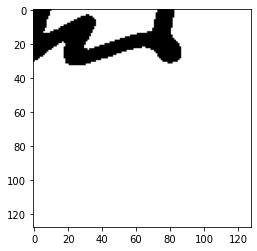

In [73]:
plt.imshow(y_test[115],   # WAS [80]
           cmap = 'gray');

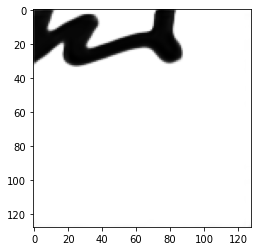

In [74]:
plt.imshow(predictions[115], # WAS [80] > 0.5,
           cmap = 'gray');

In [36]:
idx_var = 0

In [37]:
predictions[idx_var]

array([[[0.9692962 ],
        [0.9914522 ],
        [0.99875236],
        ...,
        [0.9992566 ],
        [0.997939  ],
        [0.9912405 ]],

       [[0.98984534],
        [0.99929607],
        [0.9999317 ],
        ...,
        [0.9994831 ],
        [0.99878204],
        [0.99401367]],

       [[0.99405694],
        [0.99913657],
        [0.9998183 ],
        ...,
        [0.99541163],
        [0.99211144],
        [0.9842435 ]],

       ...,

       [[0.928275  ],
        [0.96017295],
        [0.98301816],
        ...,
        [0.99823445],
        [0.99547756],
        [0.97713006]],

       [[0.9340801 ],
        [0.9653839 ],
        [0.9852494 ],
        ...,
        [0.9996531 ],
        [0.99923825],
        [0.99020314]],

       [[0.9104648 ],
        [0.94946146],
        [0.97093487],
        ...,
        [0.9984735 ],
        [0.9930345 ],
        [0.9703239 ]]], dtype=float32)

In [38]:
y[idx_var].shape

(128, 128)

In [39]:
predictions[idx_var].shape

(128, 128, 1)

In [40]:
(y[idx_var] == 0).any()

False

In [41]:
(y[200] == 0).any()

True

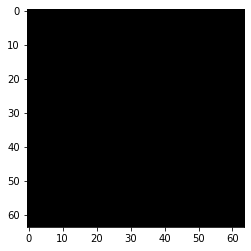

In [42]:
plt.imshow(predictions[148] > 0.5,  # ORIGINALLY 200
           cmap = 'gray');

In [116]:
idx_var = 148        # ORIGINALLY 200

f1_score(y[idx_var].flatten(),
         predictions[idx_var].flatten() > 0.5)

0.8826169272842016

In [42]:
def f1(y, predictions):
    
    f1_cont = []

    for ground_truth, prediction in zip(y, predictions):
        
        f1_cont.append(f1_score(ground_truth.flatten(),
                                prediction.flatten() > 0.5))
    
    # AVERAGE f1 SCORES
    return np.mean(f1_cont) 

In [43]:
f1(y_test, predictions)

0.9860484760632282

In [ ]:
def f1_v2(y, predictions):
    
    # f1_cont = []

    # for ground_truth, prediction in zip(y, predictions):
        
    return f1_score(y.flatten(),
                    predictions.flatten() > 0.5)
    

In [ ]:
f1_v2(y_test, predictions)

In [ ]:
np.asarray(f1(y_test, predictions)).max()

In [ ]:
predictions.max()

In [ ]:
predictions.min()

In [ ]:
len(y_test_D)

In [ ]:
len(y)

In [ ]:
len(X_test_D)

In [ ]:
len(X)

In [ ]:
len(predictions)